<a href="https://colab.research.google.com/github/harish-v07/Student-Dropout-Prediction/blob/main/StudentDropoutPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn==1.4.1.post1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [4]:
df = pd.read_csv("data.csv",sep=";")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
df.shape

(4424, 37)

In [7]:
df.size

163688

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [9]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


In [10]:
df['Target'] = LabelEncoder().fit_transform(df['Target'])

In [11]:
df['Target'].value_counts()

,count
Target,
2,2209
0,1421
1,794


Text(0.5, 1.0, 'Target')

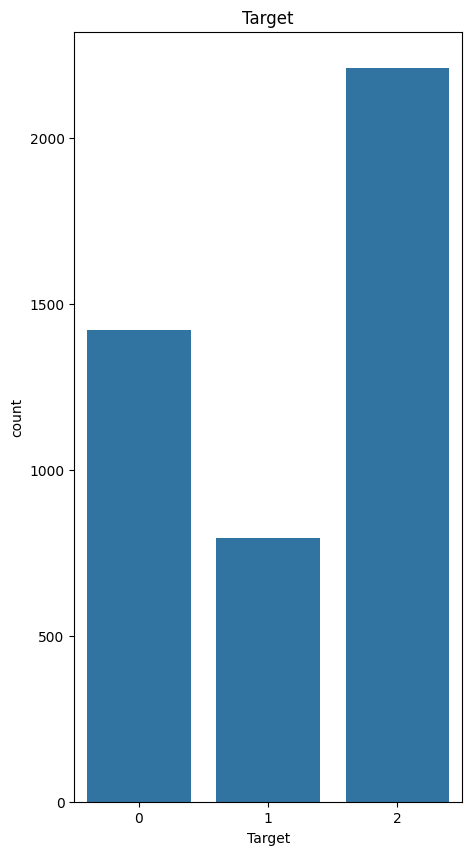

In [12]:
plt.figure(figsize=(5, 10))
sns.countplot(data = df, x="Target").set_title('Target')

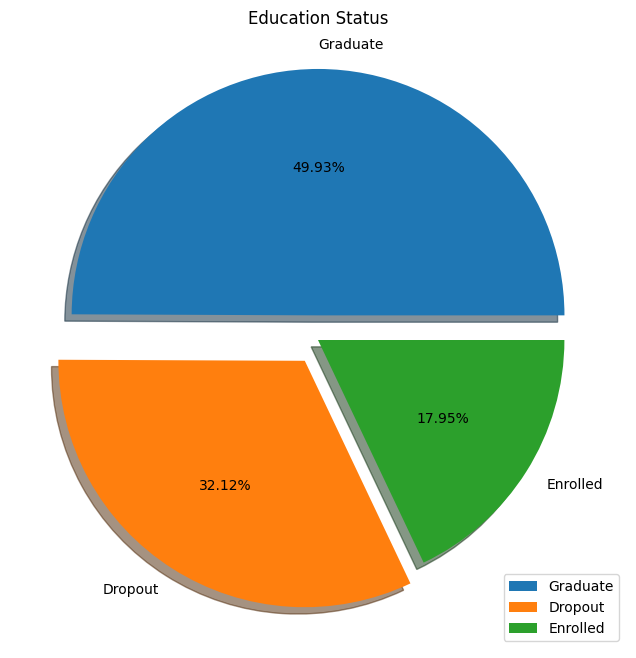

In [13]:
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(df['Target'].value_counts(), labels = ['Graduate', 'Dropout', 'Enrolled'], explode = (0.1, 0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

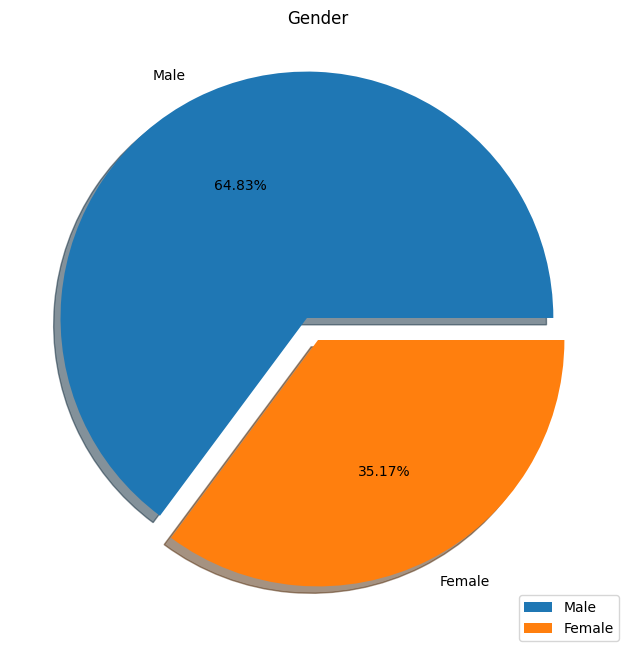

In [14]:
plt.figure(figsize=(8, 8))
plt.title("Gender")
plt.pie(df['Gender'].value_counts(), labels = ['Male', 'Female'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

<ipython-input-15-e4734a4c6b05>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:, i], color='blue')
<ipython-input-15-e4734a4c6b05>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:, i], color='blue')
<ipython-input-15-e4734a4c6b05>:5: UserWarning: 

`distplot` is a deprecated

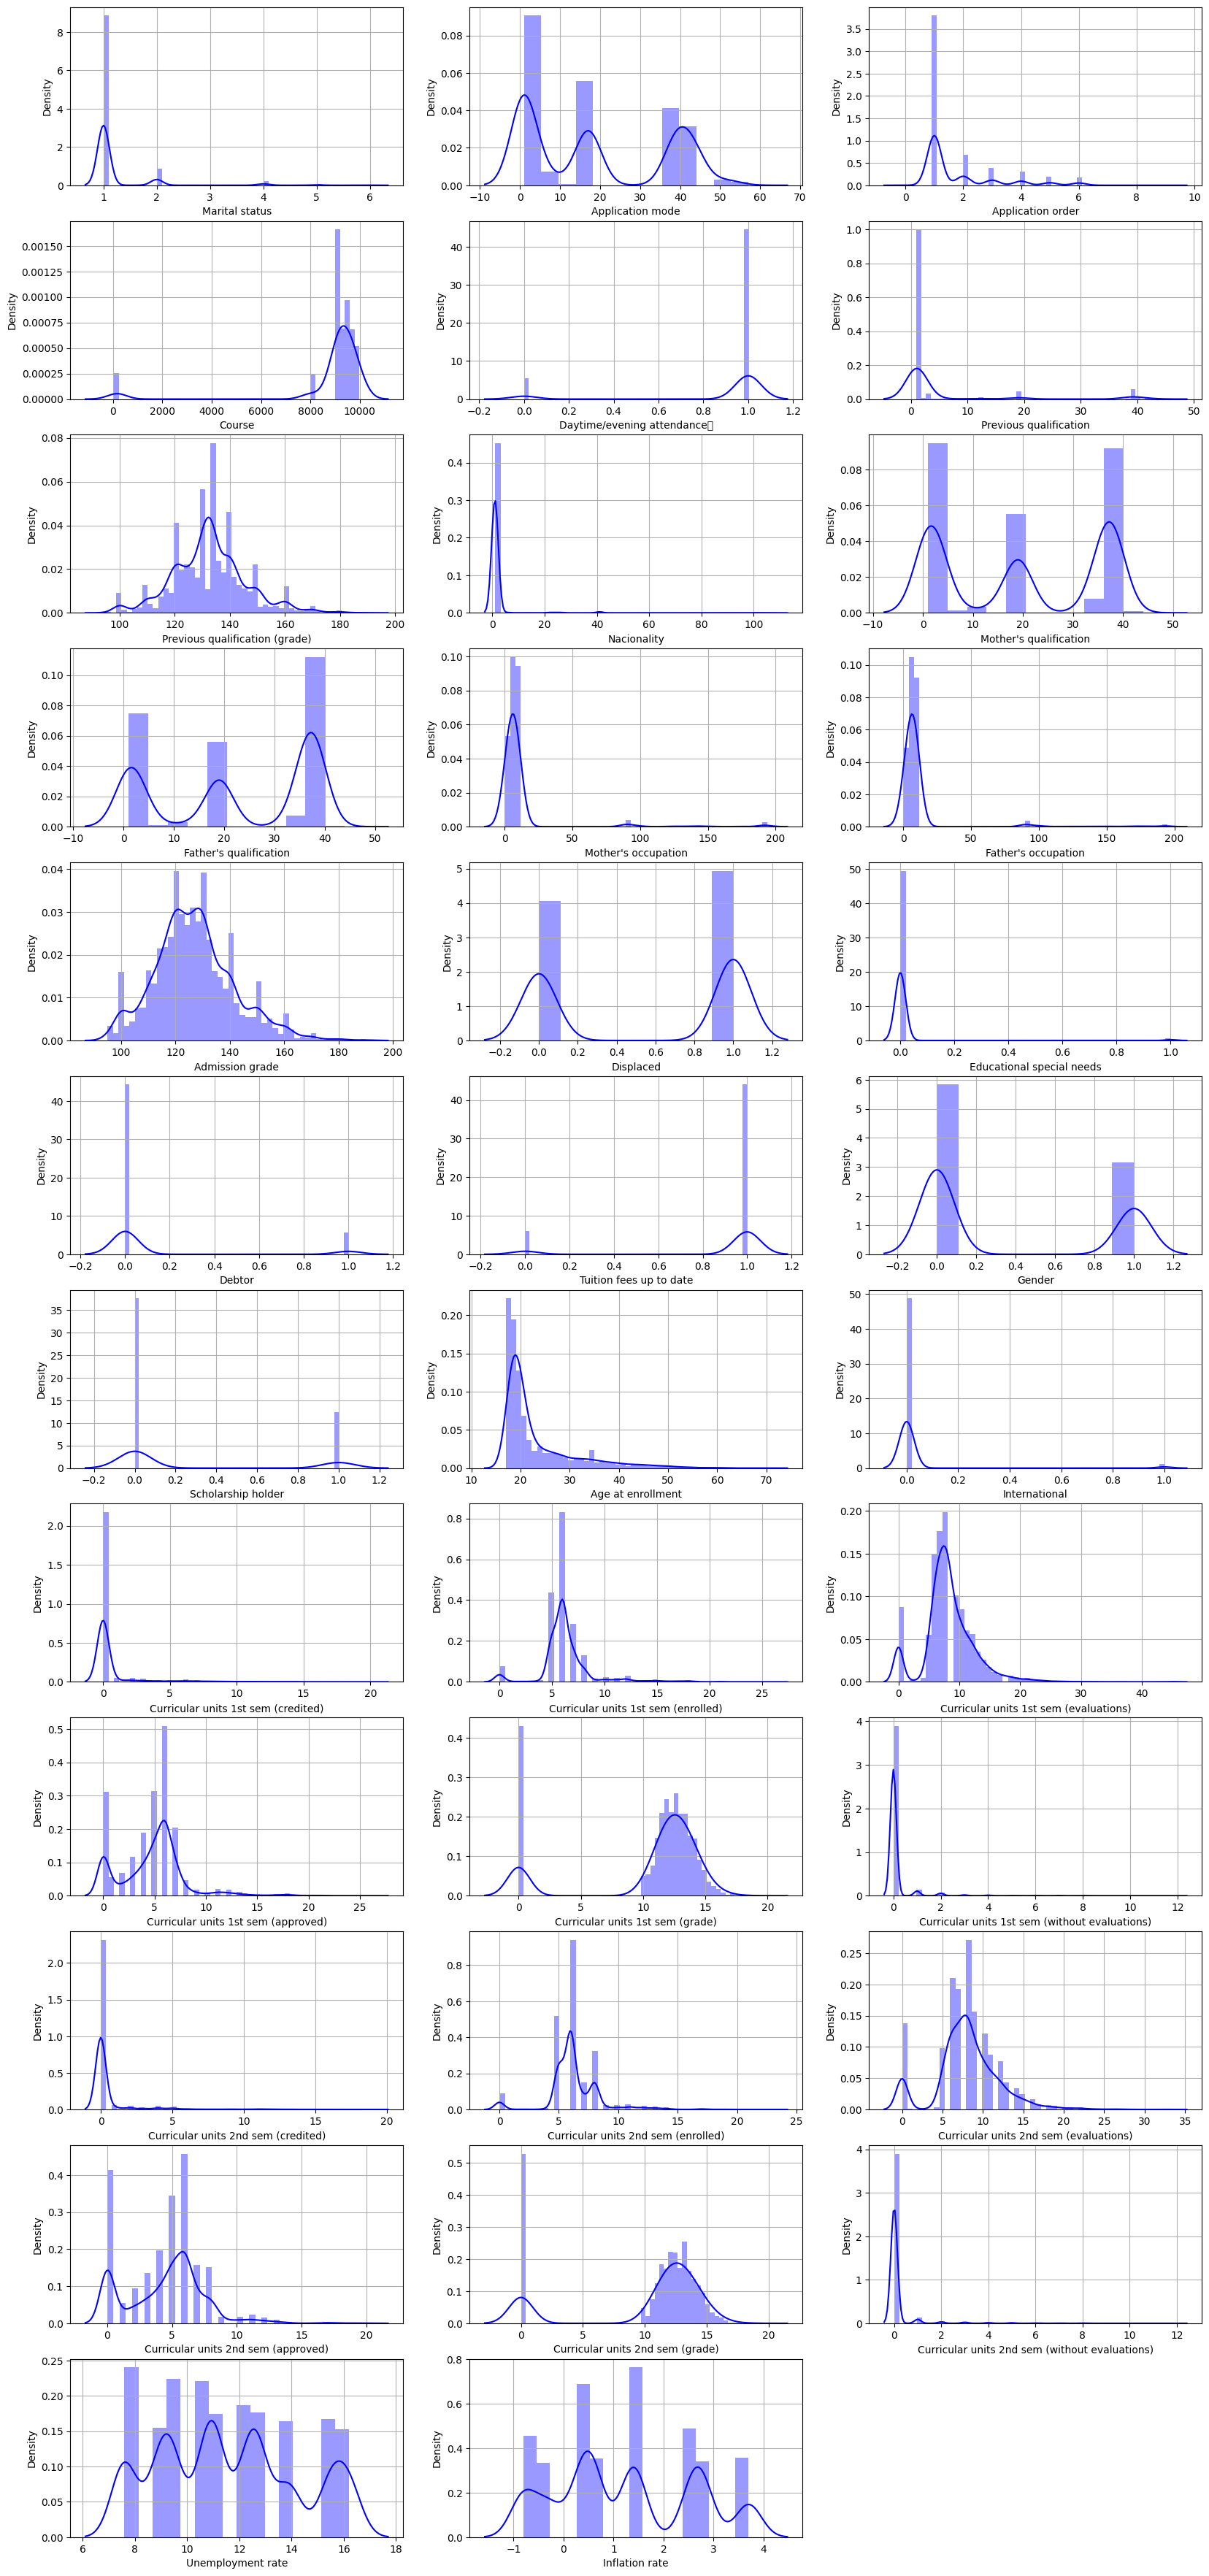

In [15]:
plt.figure(figsize=(20, 45))

for i in range(0, 35):
    plt.subplot(12,3,i+1)
    sns.distplot(df.iloc[:, i], color='blue')
    plt.grid()

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


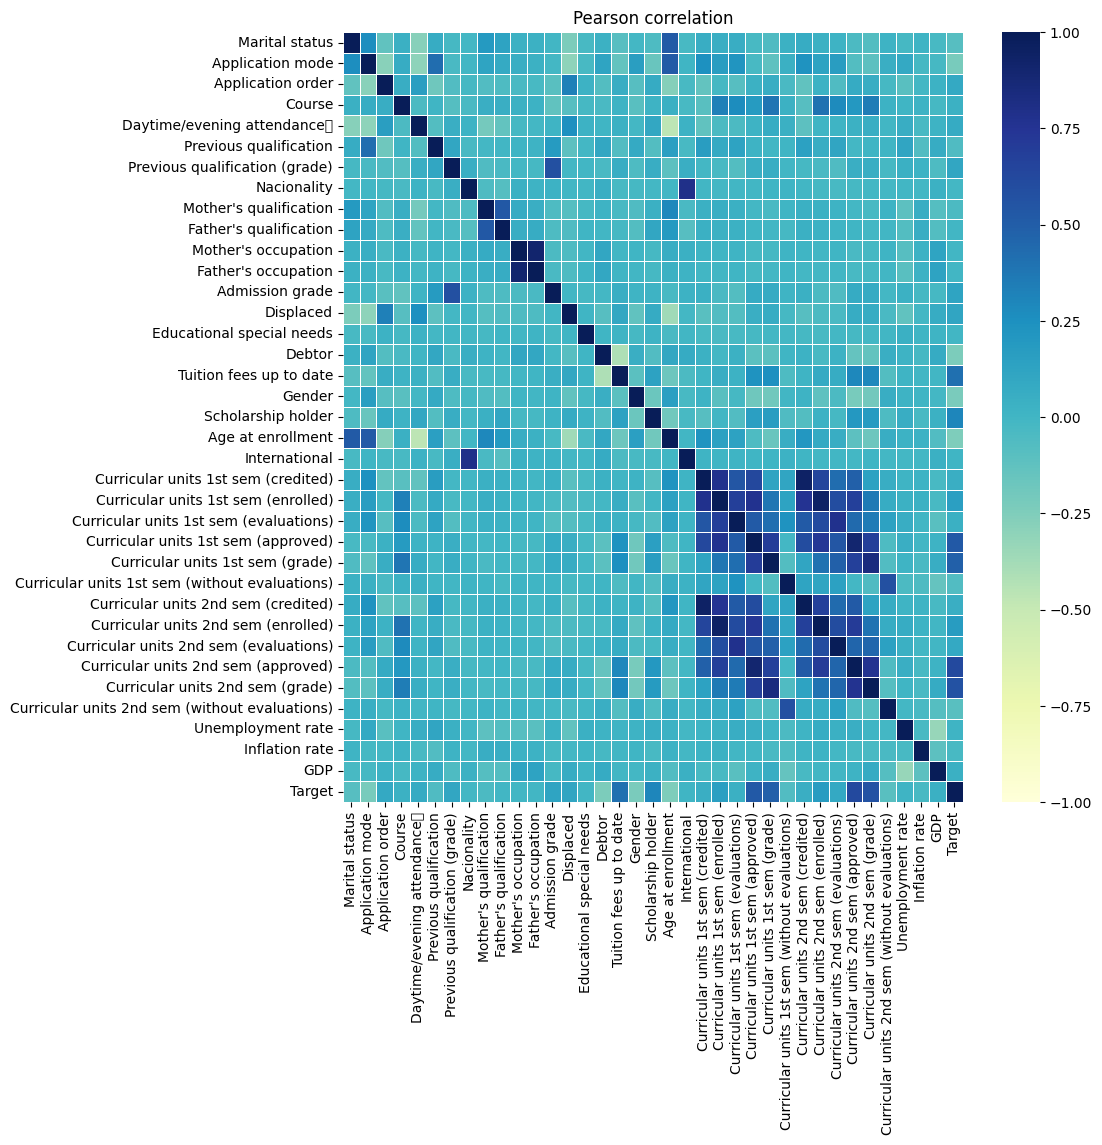

In [16]:
#feature selection
corr_matrix = df.corr(method="pearson")
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=False, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pearson correlation")
plt.show()

In [17]:
["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]
corr_matrix["Target"]

,Target
Marital status,-0.089804
Application mode,-0.221747
Application order,0.089791
Course,0.034219
Daytime/evening attendance\t,0.075107
Previous qualification,-0.056039
Previous qualification (grade),0.103764
Nacionality,-0.014801
Mother's qualification,-0.043178
Father's qualification,-0.001393


In [18]:
df.drop(df[df['Target'] == 1].index, inplace = True)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


In [19]:
df['Dropout'] = df['Target'].apply(lambda x: 1 if x==0 else 0)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,2,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,0,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,0,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,2,0


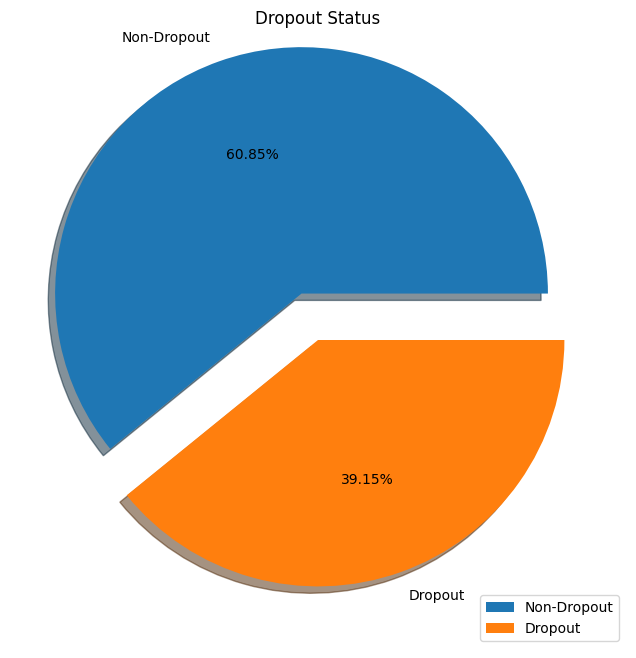

In [20]:
plt.figure(figsize=(8, 8))
plt.title("Dropout Status")
plt.pie(df['Dropout'].value_counts(),  labels = ['Non-Dropout', 'Dropout'], explode = (0.2, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

In [21]:
x = df.iloc[:, :36].values
#x = df[["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]].values
print(x)
x = StandardScaler().fit_transform(x)
x

[[ 1.   17.    5.   ... 10.8   1.4   1.74]
 [ 1.   15.    1.   ... 13.9  -0.3   0.79]
 [ 1.    1.    5.   ... 10.8   1.4   1.74]
 ...
 [ 1.    1.    1.   ... 13.9  -0.3   0.79]
 [ 1.    1.    1.   ...  9.4  -0.8  -3.12]
 [ 1.   10.    1.   ... 12.7   3.7  -1.7 ]]


array([[-0.30068558, -0.08191671,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       [-0.30068558, -0.19714928, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       ...,
       [-0.30068558, -1.00377727, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727, -0.56247077, ..., -0.83619059,
        -1.46715379, -1.37663355],
       [-0.30068558, -0.4852307 , -0.56247077, ...,  0.4010228 ,
         1.78259971, -0.74822447]])

In [22]:
y = df['Dropout'].values
y

array([1, 0, 1, ..., 1, 0, 0])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [24]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

In [25]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [26]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.9132231404958677
Recall :  0.9132231404958677
Accuracy :  0.9132231404958677
F1 Score :  0.9132231404958677

 [[429  19]
 [ 44 234]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       448
           1       0.92      0.84      0.88       278

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726

******************************************************



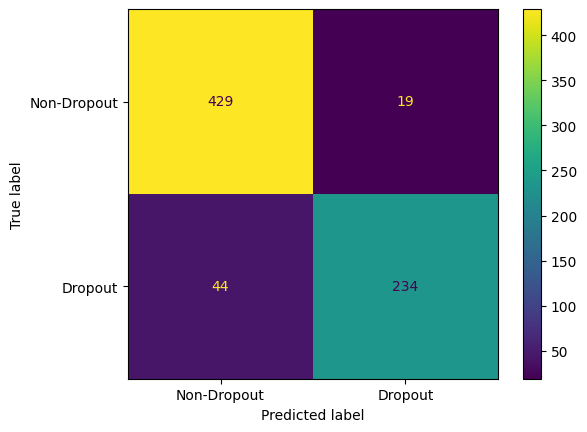

In [27]:
perform(y_pred_lr)

In [28]:
model_rf = RandomForestClassifier(n_estimators=500,criterion='entropy')
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [29]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.9173553719008265
Recall :  0.9173553719008265
Accuracy :  0.9173553719008265
F1 Score :  0.9173553719008265

 [[432  16]
 [ 44 234]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       448
           1       0.94      0.84      0.89       278

    accuracy                           0.92       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726

******************************************************



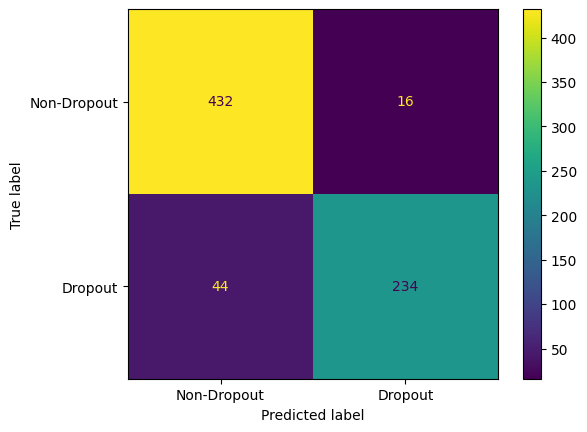

In [30]:
perform(y_pred_rf)

In [31]:
model_svc = SVC(C=0.1,kernel='linear')
model_svc.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [32]:



y_pred_svc = model_svc.predict(x_test)

Precision :  0.9214876033057852
Recall :  0.9214876033057852
Accuracy :  0.9214876033057852
F1 Score :  0.9214876033057852

 [[436  12]
 [ 45 233]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       448
           1       0.95      0.84      0.89       278

    accuracy                           0.92       726
   macro avg       0.93      0.91      0.91       726
weighted avg       0.92      0.92      0.92       726

******************************************************



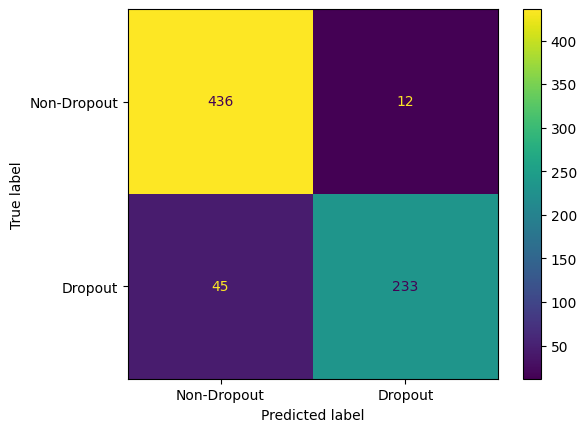

In [33]:
perform(y_pred_svc)

In [34]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred_knn = model_knn.predict(x_test)

Precision :  0.859504132231405
Recall :  0.859504132231405
Accuracy :  0.859504132231405
F1 Score :  0.859504132231405

 [[422  26]
 [ 76 202]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       448
           1       0.89      0.73      0.80       278

    accuracy                           0.86       726
   macro avg       0.87      0.83      0.85       726
weighted avg       0.86      0.86      0.86       726

******************************************************



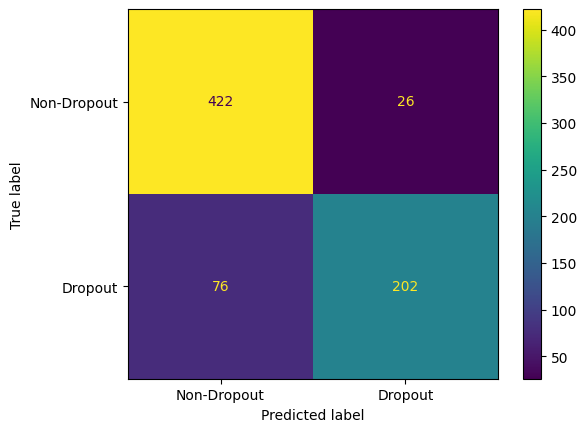

In [36]:
perform(y_pred_knn)

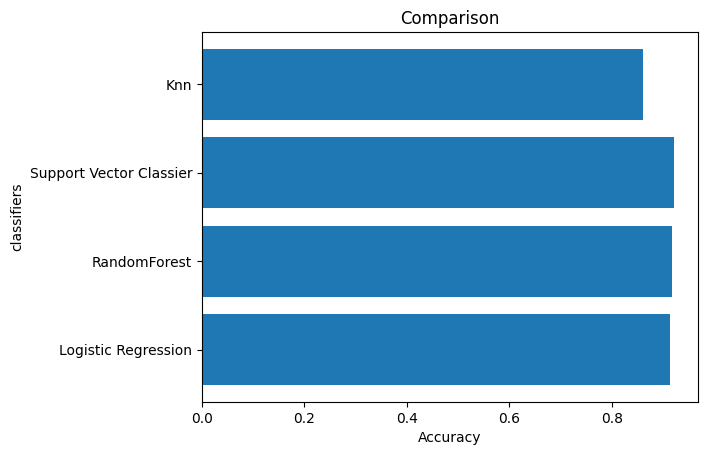

In [37]:
pred=[y_pred_lr,y_pred_rf,y_pred_svc,y_pred_knn]
acc=[]
classifiers=["Logistic Regression","RandomForest","Support Vector Classier","Knn"]
for i in pred:
    temp=accuracy_score(y_test, i)
    acc.append(temp)

plt.barh(classifiers, acc)

# Add labels and title
plt.ylabel('classifiers')
plt.xlabel('Accuracy')
plt.title('Comparison')
plt.show()


In [38]:
# Size of the original dataset
total_data_count = df.shape[0]

# Size of the training data
training_data_count = int(0.8 * total_data_count)

# Size of the testing data
testing_data_count = total_data_count - training_data_count

print("Training Data Count:", training_data_count)
print("Testing Data Count:", testing_data_count)


Training Data Count: 2904
Testing Data Count: 726


In [39]:
total_data_count = df.shape[0]
print("Total Data Count:", total_data_count)


Total Data Count: 3630


In [40]:
from sklearn.metrics import accuracy_score

# Define a function to calculate accuracy for both training and testing datasets
def calculate_accuracy(model, x_train, y_train, x_test, y_test):
    # Training accuracy
    y_train_pred = model.predict(x_train)
    training_accuracy = accuracy_score(y_train, y_train_pred)

    # Testing accuracy
    y_test_pred = model.predict(x_test)
    testing_accuracy = accuracy_score(y_test, y_test_pred)

    return training_accuracy, testing_accuracy

# List to store training and testing accuracies for each model
accuracies = []

# Calculate accuracy for Logistic Regression
training_accuracy_lr, testing_accuracy_lr = calculate_accuracy(model_lr, x_train, y_train, x_test, y_test)
accuracies.append(('Logistic Regression', training_accuracy_lr, testing_accuracy_lr))

# Calculate accuracy for Random Forest
training_accuracy_rf, testing_accuracy_rf = calculate_accuracy(model_rf, x_train, y_train, x_test, y_test)
accuracies.append(('Random Forest', training_accuracy_rf, testing_accuracy_rf))

# Calculate accuracy for SVC
training_accuracy_svc, testing_accuracy_svc = calculate_accuracy(model_svc, x_train, y_train, x_test, y_test)
accuracies.append(('Support Vector Classifier', training_accuracy_svc, testing_accuracy_svc))

# Calculate accuracy for KNN
training_accuracy_knn, testing_accuracy_knn = calculate_accuracy(model_knn, x_train, y_train, x_test, y_test)
accuracies.append(('KNN', training_accuracy_knn, testing_accuracy_knn))

# Print accuracies
print("Model\t\t\tTraining Accuracy\tTesting Accuracy")
print("-" * 54)
for model_name, training_acc, testing_acc in accuracies:
    print(f"{model_name.ljust(25)}\t{training_acc:.4f}\t\t\t{testing_acc:.4f}")


Model			Training Accuracy	Testing Accuracy
------------------------------------------------------
Logistic Regression      	0.9184			0.9132
Random Forest            	1.0000			0.9174
Support Vector Classifier	0.9139			0.9215
KNN                      	0.9156			0.8595


In [41]:
# Displaying the row count in the testing data
print("Number of rows in testing data:", x_test.shape[0])


Number of rows in testing data: 726


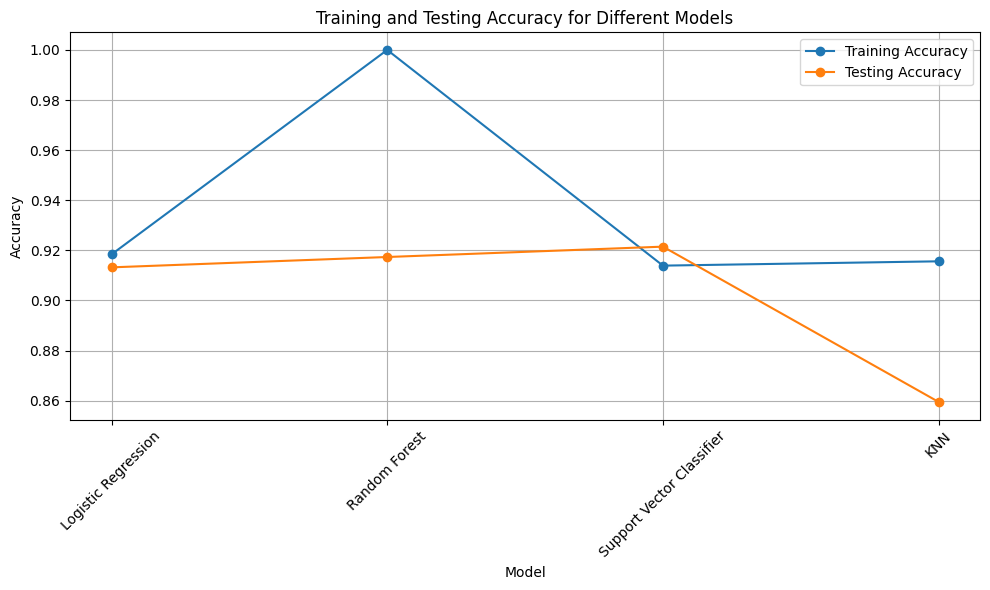

In [42]:
import matplotlib.pyplot as plt

# List to store model names, training accuracies, and testing accuracies
model_names = ['Logistic Regression', 'Random Forest', 'Support Vector Classifier', 'KNN']
training_accuracies = [training_accuracy_lr, training_accuracy_rf, training_accuracy_svc, training_accuracy_knn]
testing_accuracies = [testing_accuracy_lr, testing_accuracy_rf, testing_accuracy_svc, testing_accuracy_knn]

# Plotting
plt.figure(figsize=(10, 6))

# Plot training accuracies
plt.plot(model_names, training_accuracies, marker='o', label='Training Accuracy')

# Plot testing accuracies
plt.plot(model_names, testing_accuracies, marker='o', label='Testing Accuracy')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Different Models')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [43]:
# Assuming you have a trained random forest classifier named model_rf and input data named ip_data
ip_data = (1,39,1,9147,1,1,140.0,1,12,3,4,3,118.0,1,0,0,1,0,0,24,0,0,5,5,0,0.0,0,0,5,5,0,0.0,0,7.6,2.6,0.32)
# Reshape the input data into a numpy array with shape (1, num_features)
import numpy as np
ip_data_reshaped = np.array(ip_data).reshape(1, -1)

# Make predictions on the input data
prediction = model_rf.predict(ip_data_reshaped)

# Interpret the prediction
if prediction[0] == 1:
    print("The individual is predicted to be a dropout.")
else:
    print("The individual is predicted to not dropout.")

The individual is predicted to be a dropout.


In [44]:
# Assuming you have a trained random forest classifier named model_rf and input data named ip_data
ip_data = (1,17,1,9500,1,1,141.0,1,38,38,7,10,139.8,1,0,0,1,0,0,18,0,0,8,8,8,14.93,0,0,8,8,8,14.93,0,9.4,-0.8,-3.12)
# Reshape the input data into a numpy array with shape (1, num_features)
import numpy as np
ip_data_reshaped = np.array(ip_data).reshape(1, -1)

# Make predictions on the input data
prediction_proba = model_rf.predict_proba(ip_data_reshaped)

# Get the probability of dropout (assuming class 1 is dropout)
dropout_probability = prediction_proba[0][1] * 100

print(f"The probability that the individual will dropout is: {dropout_probability:.2f}%")


The probability that the individual will dropout is: 24.00%


In [45]:
import pickle

In [46]:
filename = 'dropout_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

In [47]:
loaded_model = pickle.load(open('dropout_model.pkl', 'rb'))

In [48]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("data.csv", sep=";")

# Get all column names
columns = df.columns

print("Columns in data.csv:")
for column in columns:
    print(column)

Columns in data.csv:
Marital status
Application mode
Application order
Course
Daytime/evening attendance	
Previous qualification
Previous qualification (grade)
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Admission grade
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
Age at enrollment
International
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP
Target
